In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Notebook Scripts'

In [3]:
df = pd.read_csv("C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Data\\heart_disease.csv")
print(df.head())

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
print(df.describe())

               Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0

In [6]:
print(df.isnull().sum())

Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64


In [7]:
# Features like Alcohol Consumption have very high nulls (2586) — likely most of your dataset.

# Features like Age, Gender, Blood Pressure have only a few missing values — easier to handle.

# Heart Disease Status has no missing values — good, as it’s your target variable.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Gender','Exercise Habits','Smoking','Family Heart Disease','Diabetes','High Blood Pressure',
                    'High LDL Cholesterol','Alcohol Consumption','Stress Level','Sugar Consumption',
                    'Heart Disease Status','Low HDL Cholesterol']

encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [9]:
print(df.head())

    Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0       1           153.0              155.0                0        1   
1  69.0       0           146.0              286.0                0        0   
2  46.0       1           126.0              216.0                1        0   
3  32.0       0           122.0              293.0                0        1   
4  60.0       1           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                     1         0  24.991591                    1  ...   
1                     1         1  25.221799                    0  ...   
2                     0         0  29.855447                    0  ...   
3                     1         0  24.130477                    1  ...   
4                     1         1  20.486289                    1  ...   

   High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \

In [10]:
numerical_cols = ['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level',
                  'Fasting Blood Sugar','CRP Level','Homocysteine Level', 'Gender','Exercise Habits',
                  'Smoking','Family Heart Disease','Diabetes','High Blood Pressure','Low HDL Cholesterol','High LDL Cholesterol',
                  'Alcohol Consumption','Stress Level','Sugar Consumption','Heart Disease Status']

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select only numerical columns for Iterative Imputer
num_data = df[numerical_cols]

imputer = IterativeImputer(random_state=42)
df[numerical_cols] = imputer.fit_transform(num_data)


# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [12]:
print(df.isnull().sum())

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


In [13]:
print(df.duplicated().sum())

0


In [14]:
# Save transformed data
df.to_csv("C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Data\\heart_disease_Cleaned.csv", index=False)

In [15]:
# !pip install pyodbc sqlalchemy pandas

In [16]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)', 'ODBC Driver 18 for SQL Server']


In [17]:
# Read your dataset (update with your actual file path)
dff = pd.read_csv("C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Data\\heart_disease_cleaned.csv")
print(dff.head())

print(dff.shape)
dff.head()

    Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0     1.0           153.0              155.0              0.0      1.0   
1  69.0     0.0           146.0              286.0              0.0      0.0   
2  46.0     1.0           126.0              216.0              1.0      0.0   
3  32.0     0.0           122.0              293.0              0.0      1.0   
4  60.0     1.0           166.0              242.0              1.0      1.0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                   1.0       0.0  24.991591                  1.0  ...   
1                   1.0       1.0  25.221799                  0.0  ...   
2                   0.0       0.0  29.855447                  0.0  ...   
3                   1.0       0.0  24.130477                  1.0  ...   
4                   1.0       1.0  20.486289                  1.0  ...   

   High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \

Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0     1.0           153.0              155.0              0.0      1.0   
1  69.0     0.0           146.0              286.0              0.0      0.0   
2  46.0     1.0           126.0              216.0              1.0      0.0   
3  32.0     0.0           122.0              293.0              0.0      1.0   
4  60.0     1.0           166.0              242.0              1.0      1.0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                   1.0       0.0  24.991591                  1.0  ...   
1                   1.0       1.0  25.221799                  0.0  ...   
2                   0.0       0.0  29.855447                  0.0  ...   
3                   1.0       0.0  24.130477                  1.0  ...   
4                   1.0       1.0  20.486289                  1.0  ...   

   High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \
0                   0.0                  0.0           2.0     7.633228   
1                   0.0                  2.0           0.0     8.744034   
2                   1.0                  1.0           1.0     4.440440   
3                   1.0                  1.0           0.0     5.249405   
4                   0.0                  1.0           0.0     7.030971   

   Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                2.0               342.0           120.220517  12.969246   
1                2.0               133.0           157.000000   9.355389   
2                1.0               393.0            92.000000  12.709873   
3                0.0               293.0            94.000000  12.509046   
4                0.0               263.0           154.000000  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                   0.0  
1           19.298875                   0.0  
2           11.230926                   0.0  
3            5.961958                   0.0  
4            8.153887                   0.0  

[5 rows x 21 columns]

In [18]:

# import pyodbc
# from sqlalchemy import create_engine, text

# # 1️⃣ Load your CSV file
# dff = pd.read_csv("C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Data\\heart_disease_cleaned.csv")

# # 2️⃣ SQL Server connection parameters
# server = 'localhost'            # your SQL Server instance name
# database = 'HeartHealthDB'      # your database name
# driver = 'ODBC Driver 18 for SQL Server'

# # 3️⃣ Create SQLAlchemy connection string
# connection_string = f"mssql+pyodbc://@{server}/{database}?driver={driver.replace(' ', '+')}&Trusted_Connection=yes&Encrypt=no"
# engine = create_engine(connection_string)

# # 4️⃣ Define your table schema (optional)
# # Automatically creates the table structure from DataFrame

# table_name = 'HeartDiesesTest'

# # 5️⃣ Push data to SQL Server
# dff.to_sql(table_name, engine, if_exists='replace', index=False)

# print(f"✅ Data successfully inserted into table '{table_name}' in database '{database}'.")


In [19]:
# with engine.connect() as conn:
#     result = conn.execute(text(f"SELECT TOP 5 * FROM {table_name}"))
#     for row in result:
#         print(row)

In [20]:
df = pd.read_csv("C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Data\\heart_disease_cleaned.csv")

# Basic info
print(df.shape)
print(df.info())
print(df.describe())

# Check missing/null values
print(df.isnull().sum())

# Check duplicate entries
print(df.duplicated().sum())

(10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  float64
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  float64
 5   Smoking               10000 non-null  float64
 6   Family Heart Disease  10000 non-null  float64
 7   Diabetes              10000 non-null  float64
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  float64
 10  Low HDL Cholesterol   10000 non-null  float64
 11  High LDL Cholesterol  10000 non-null  float64
 12  Alcohol Consumption   10000 non-null  float64
 13  Stress Level          10000 non-null  float64
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Co

In [21]:
import os

# Define output folder
output_dir = "C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Output Graphs\\"

print(f"All outputs will be saved in: {os.path.abspath(output_dir)}")


All outputs will be saved in: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs


Univariate Analysis (Feature-wise Exploration)

Numerical Features:
Visualize distribution of each numeric column to check for outliers, skewness, and central tendency.

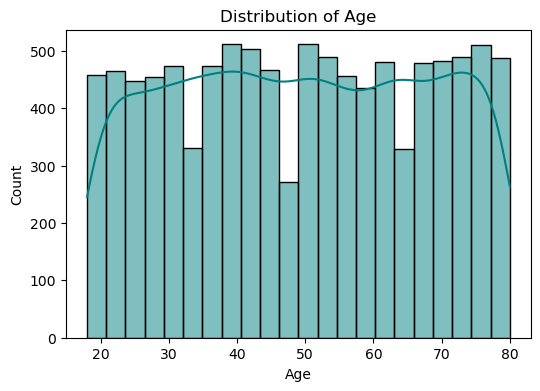

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Age.png


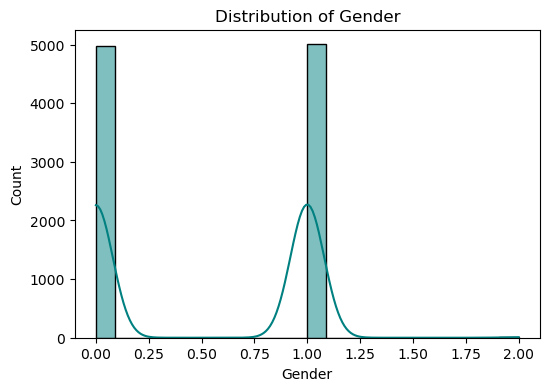

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Gender.png


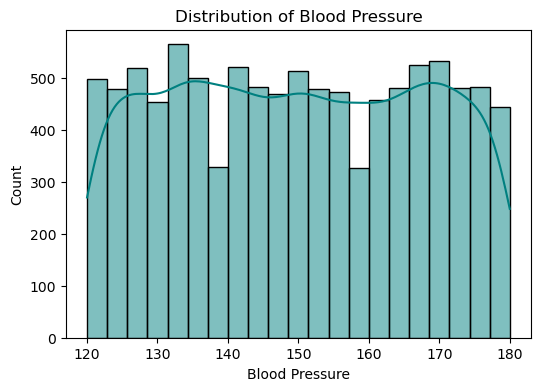

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Blood Pressure.png


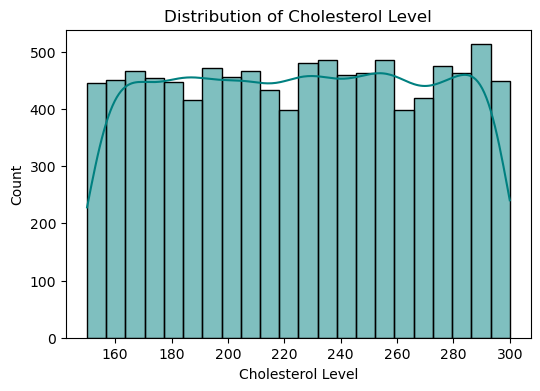

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Cholesterol Level.png


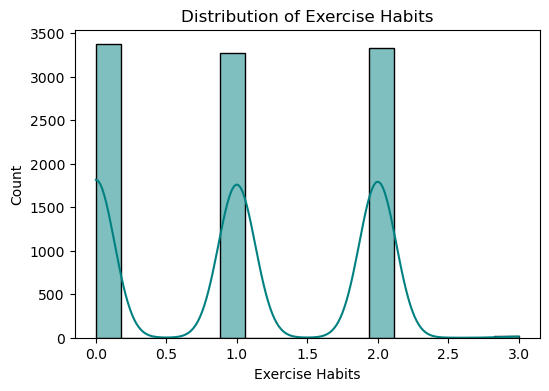

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Exercise Habits.png


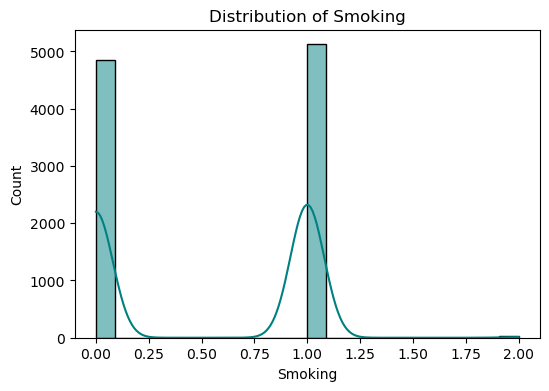

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Smoking.png


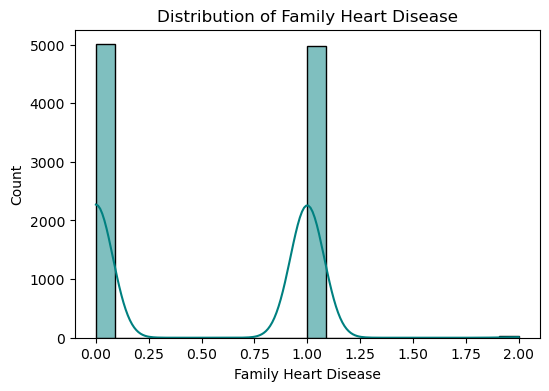

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Family Heart Disease.png


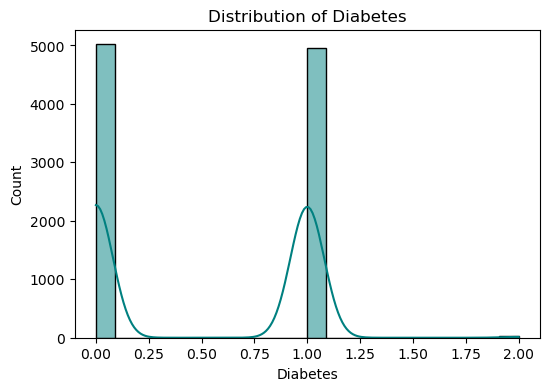

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Diabetes.png


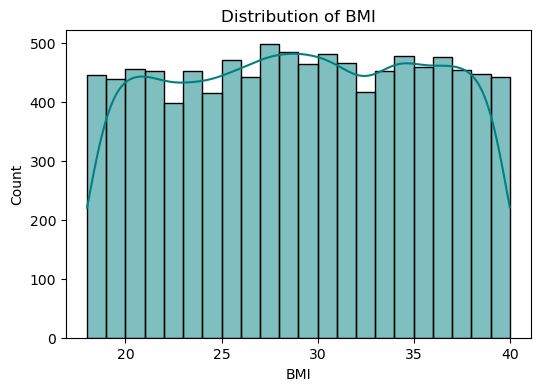

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_BMI.png


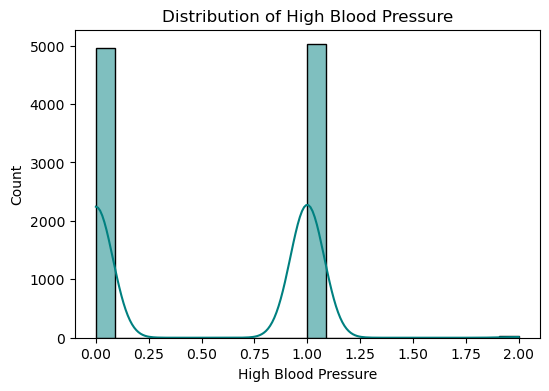

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_High Blood Pressure.png


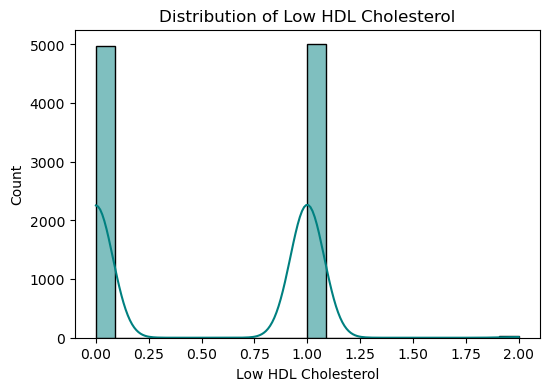

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Low HDL Cholesterol.png


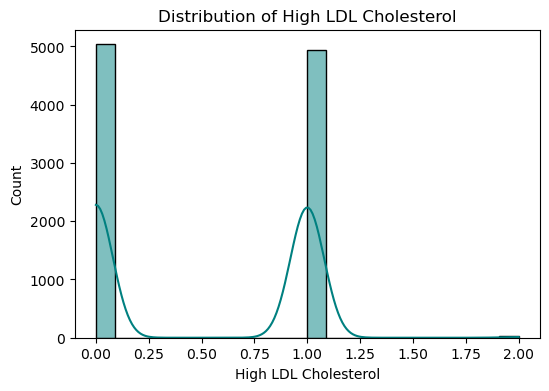

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_High LDL Cholesterol.png


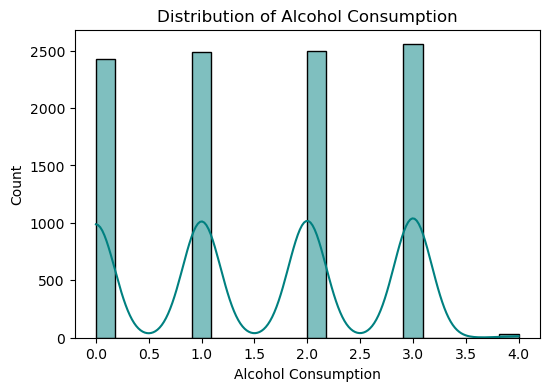

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Alcohol Consumption.png


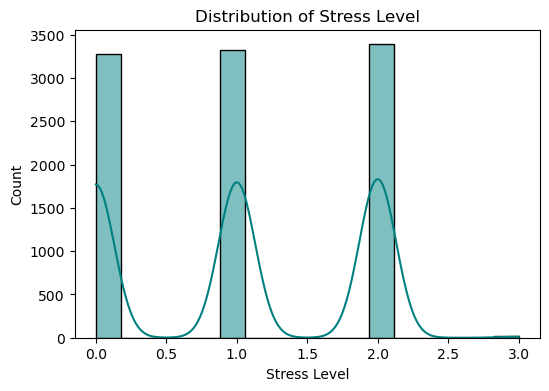

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Stress Level.png


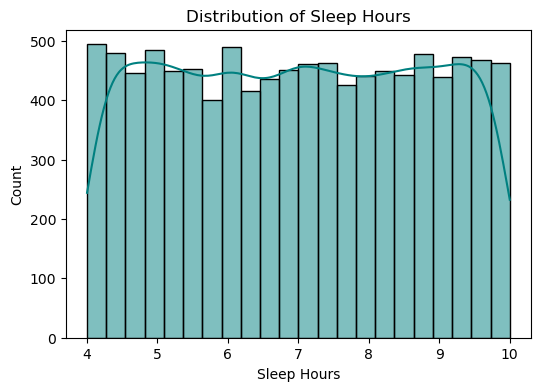

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Sleep Hours.png


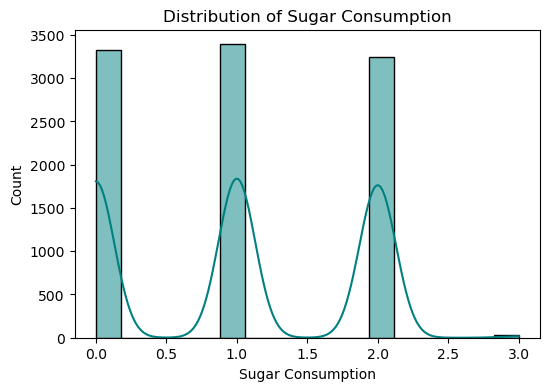

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Sugar Consumption.png


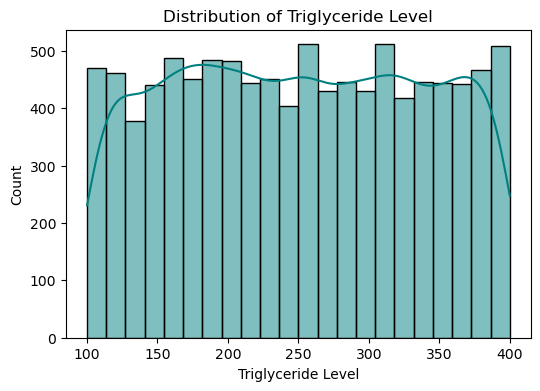

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Triglyceride Level.png


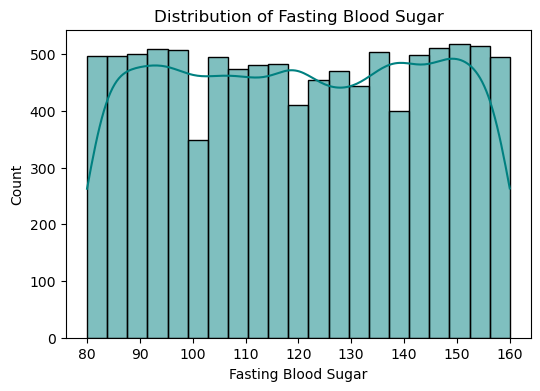

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Fasting Blood Sugar.png


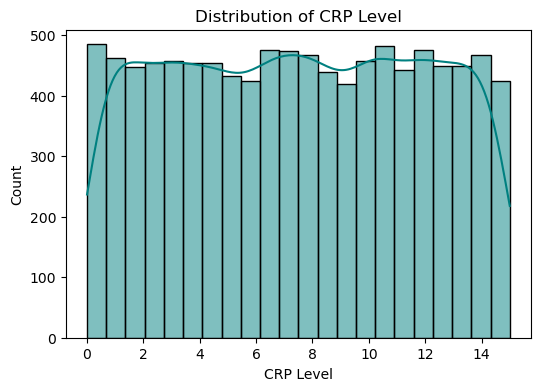

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_CRP Level.png


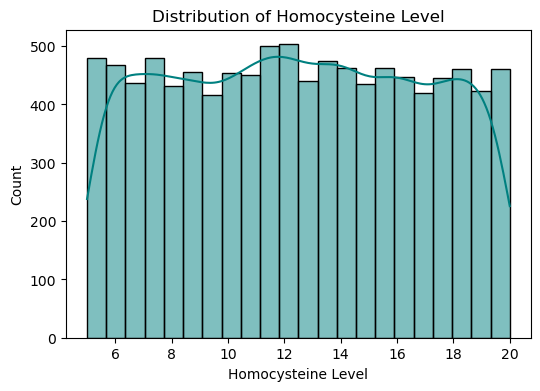

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Homocysteine Level.png


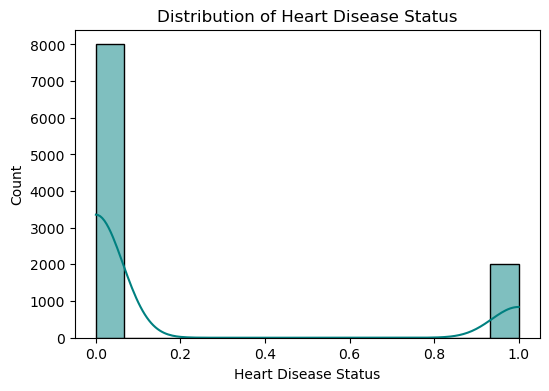

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Distribution_of_Heart Disease Status.png


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='teal', ax=ax)
    ax.set_title(f'Distribution of {col}')

    # Save figure
    plot_path = os.path.join(output_dir, f'Distribution_of_{col}.png')
    fig.savefig(plot_path, bbox_inches='tight')
    plt.show()
    plt.close(fig)
    print(f"📈 Plot saved at: {plot_path}")

Bivariate Analysis (Feature Relationships)

Continuous vs Target:
See how each continuous variable differs by Heart Disease Status.

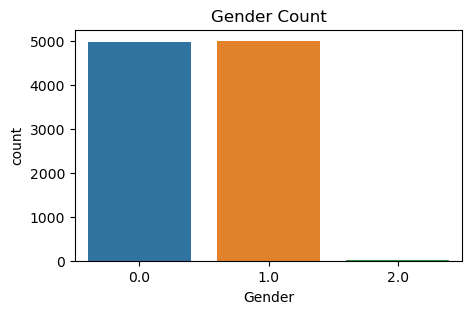

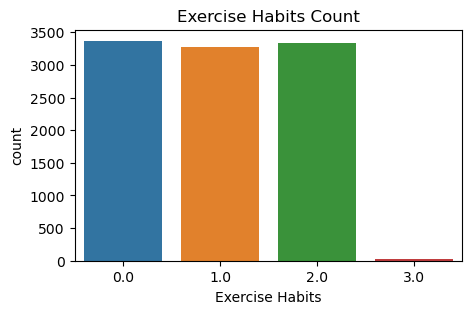

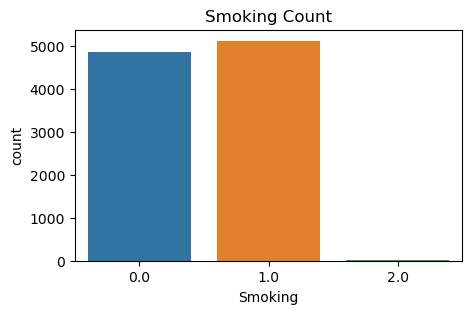

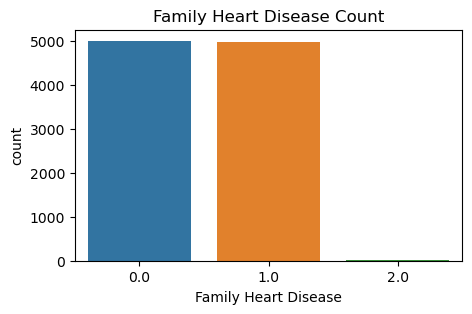

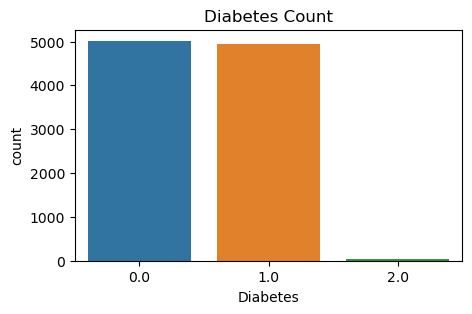

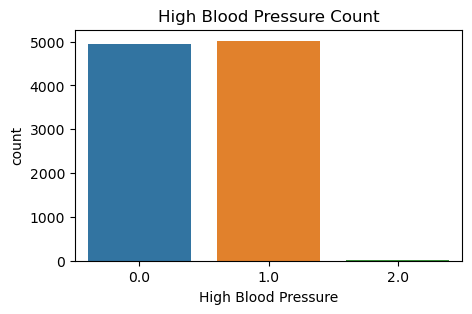

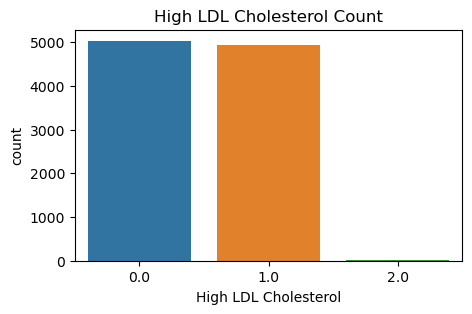

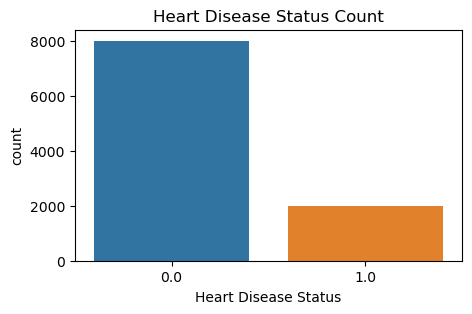

In [23]:
cat_cols = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 
            'Diabetes', 'High Blood Pressure', 'High LDL Cholesterol', 'Heart Disease Status']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Count')
    plt.show()


Bivariate Analysis (Feature Relationships)

Continuous vs Target:
See how each continuous variable differs by Heart Disease Status.

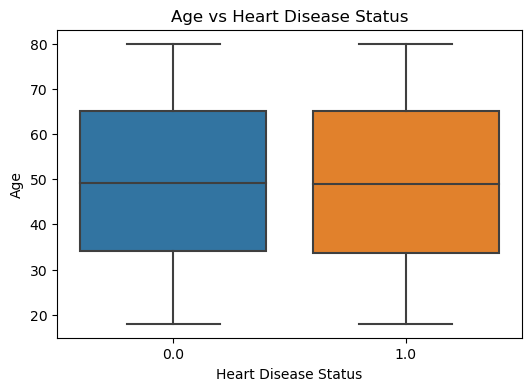

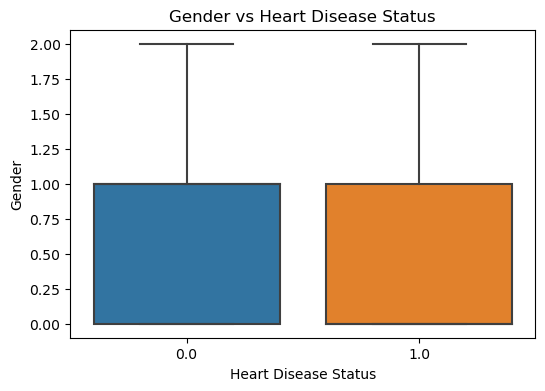

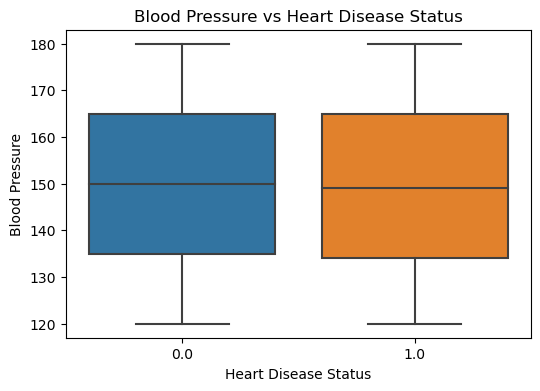

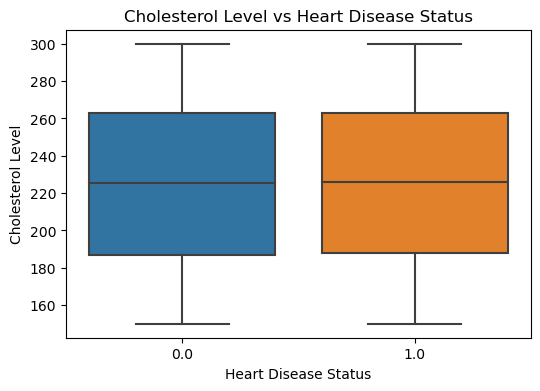

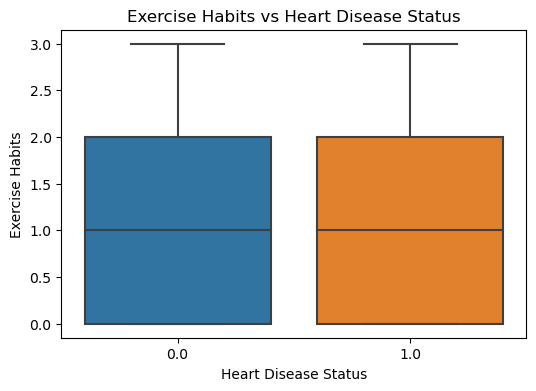

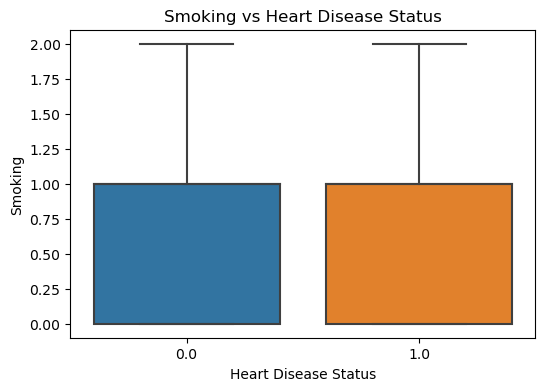

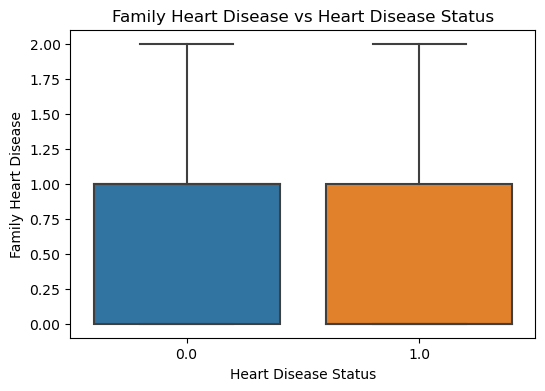

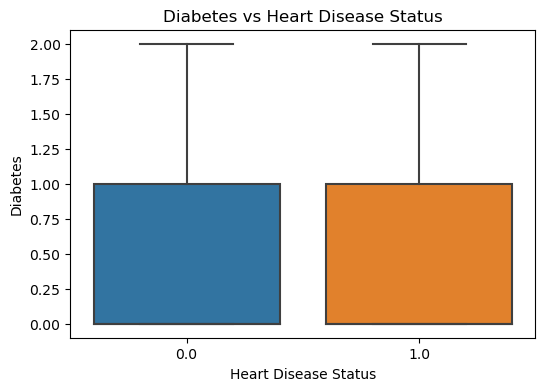

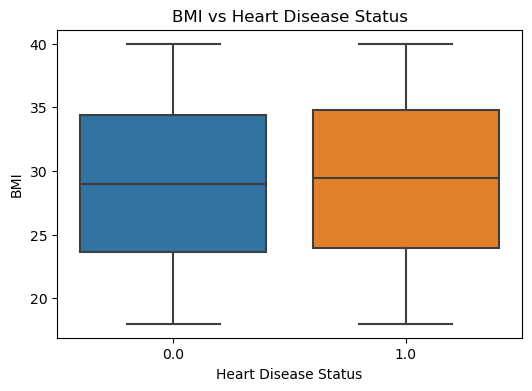

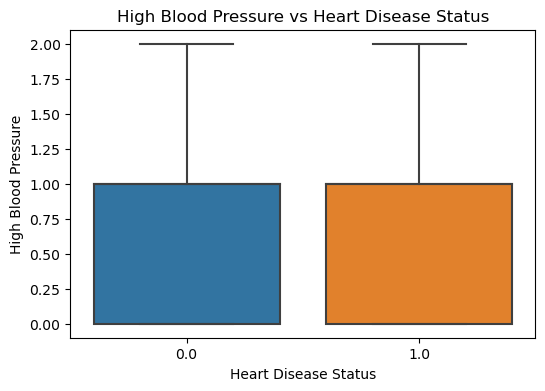

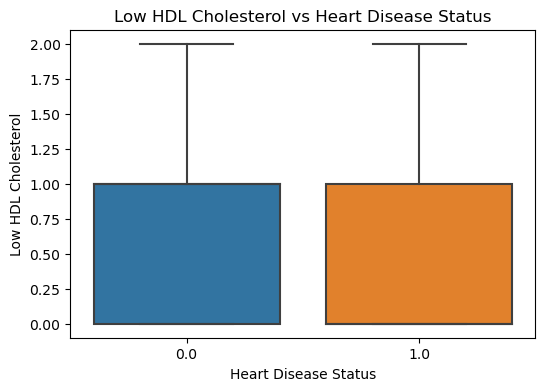

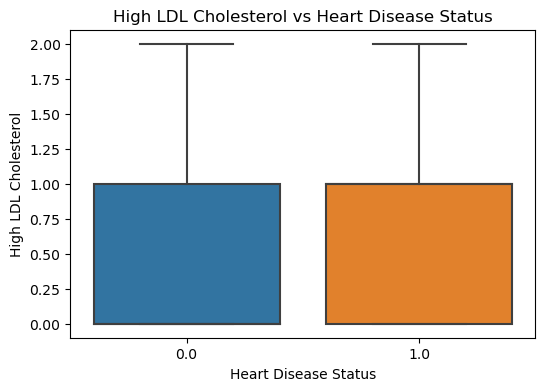

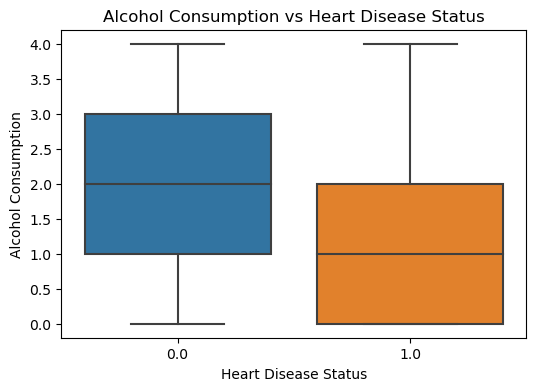

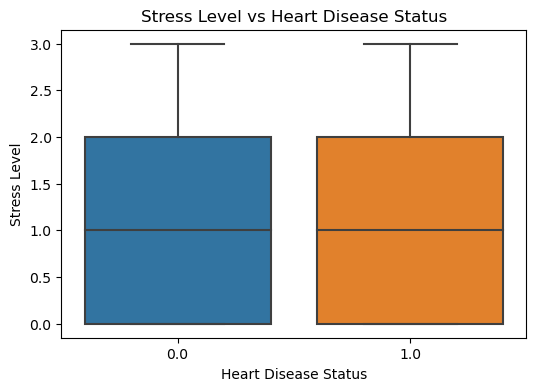

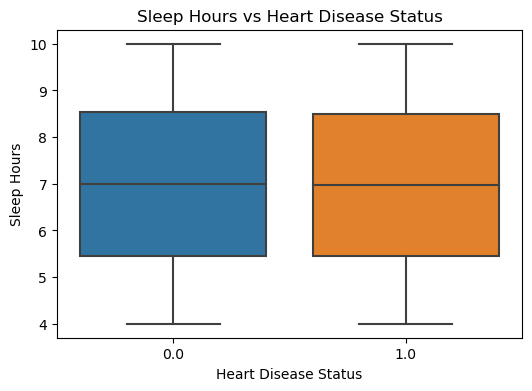

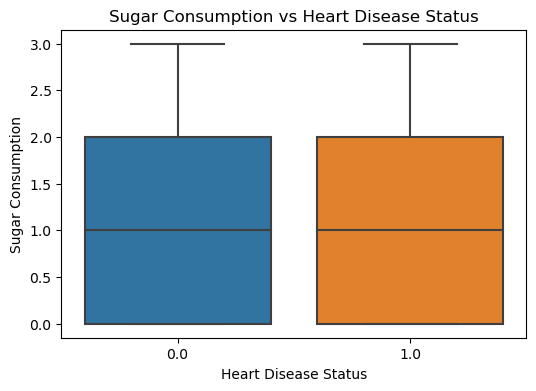

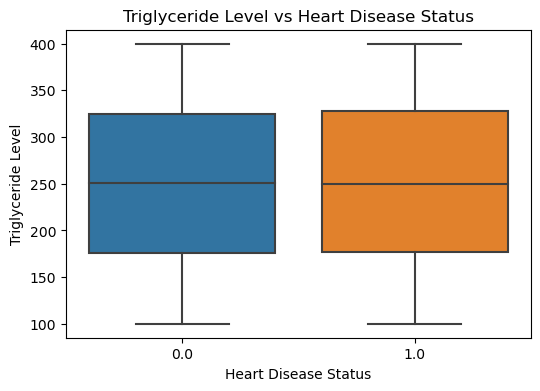

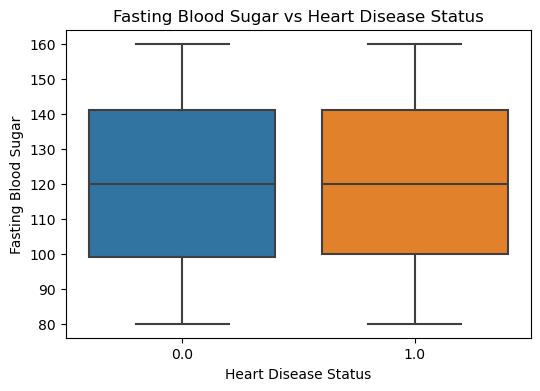

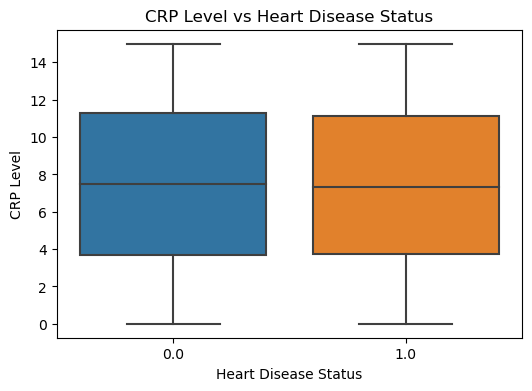

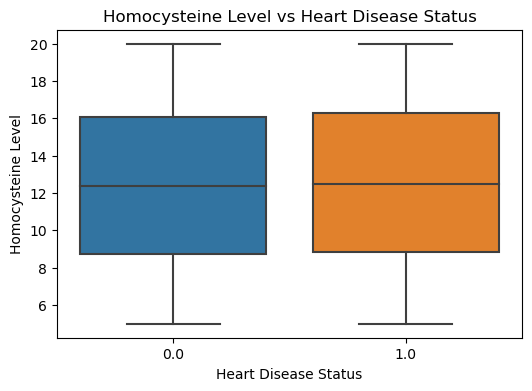

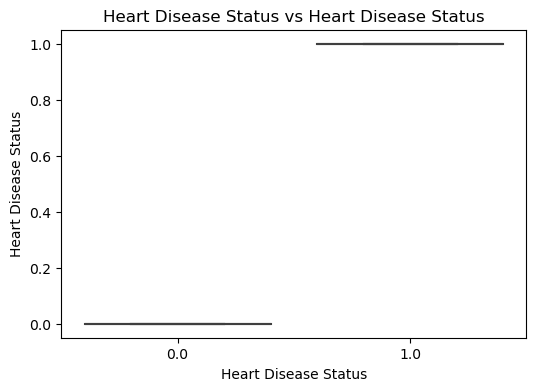

In [24]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Heart Disease Status', y=col, data=df)
    plt.title(f'{col} vs Heart Disease Status')
    plt.show()


Correlation Analysis

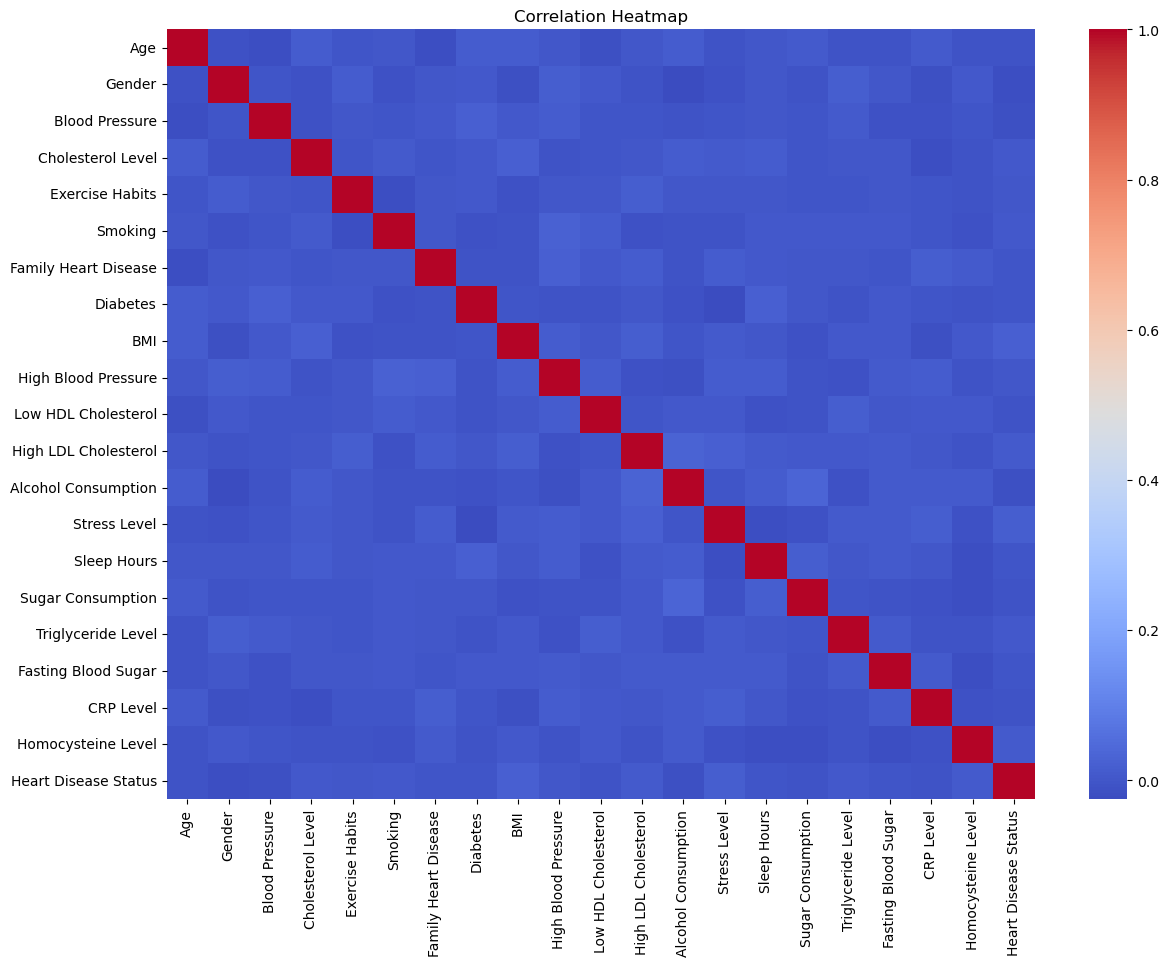

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Correlation_Heatmap.png


In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")


# Save figure
plot_path = os.path.join(output_dir, 'Correlation_Heatmap.png')
plt.savefig(plot_path, bbox_inches='tight')
plt.show()
plt.close()
print(f"📈 Plot saved at: {plot_path}")



Pairwise Relationships
To visually understand multi-feature interactions:

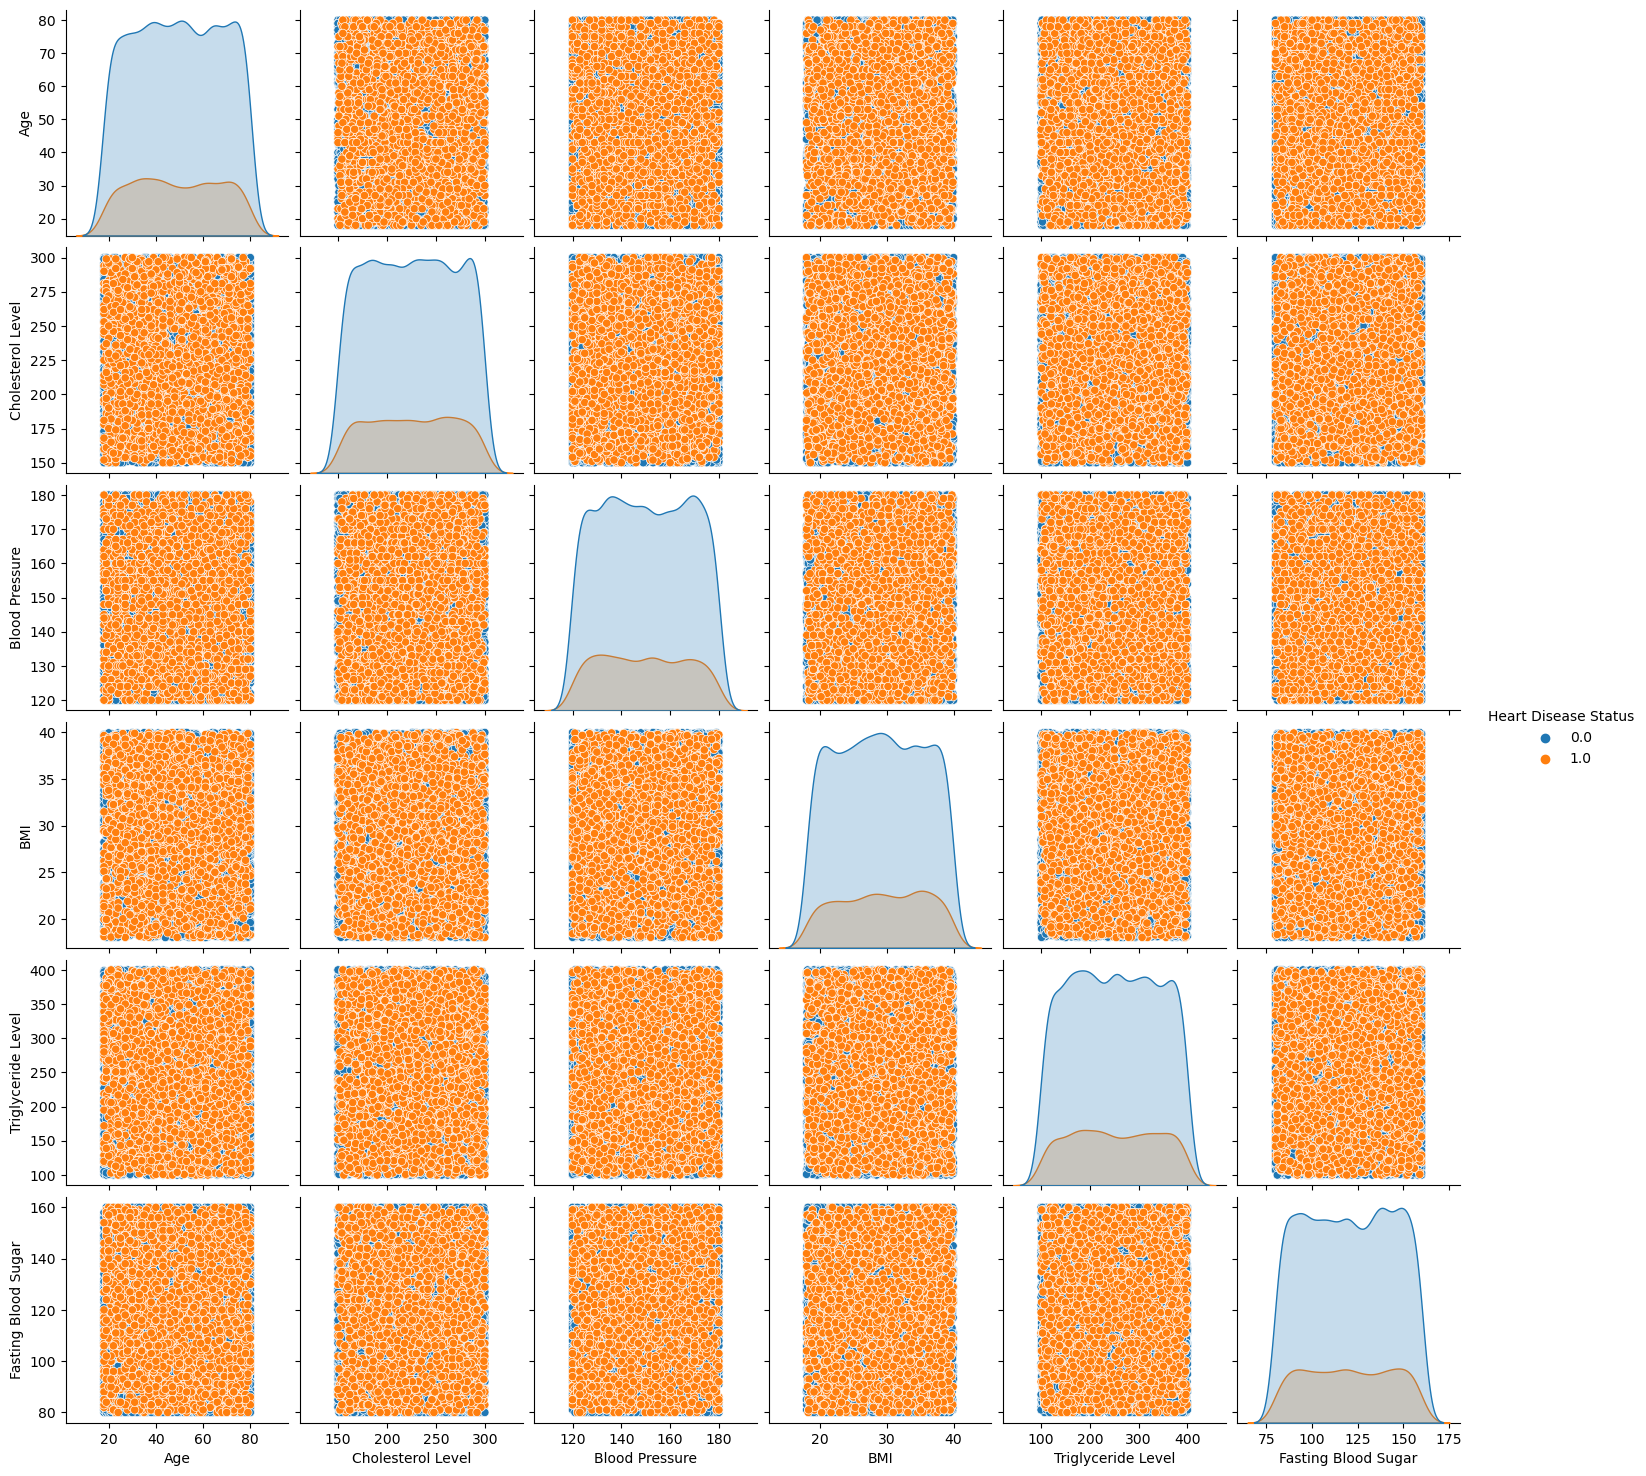

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\multi-feature_interactions.png


In [26]:
sns.pairplot(df[['Age', 'Cholesterol Level', 'Blood Pressure', 'BMI', 
                 'Triglyceride Level', 'Fasting Blood Sugar', 'Heart Disease Status']], 
             hue='Heart Disease Status')

# Save figure
plot_path = os.path.join(output_dir, 'multi-feature_interactions.png')
plt.savefig(plot_path, bbox_inches='tight')
plt.show()
plt.close()
print(f"📈 Plot saved at: {plot_path}")

Feature Importance Estimation



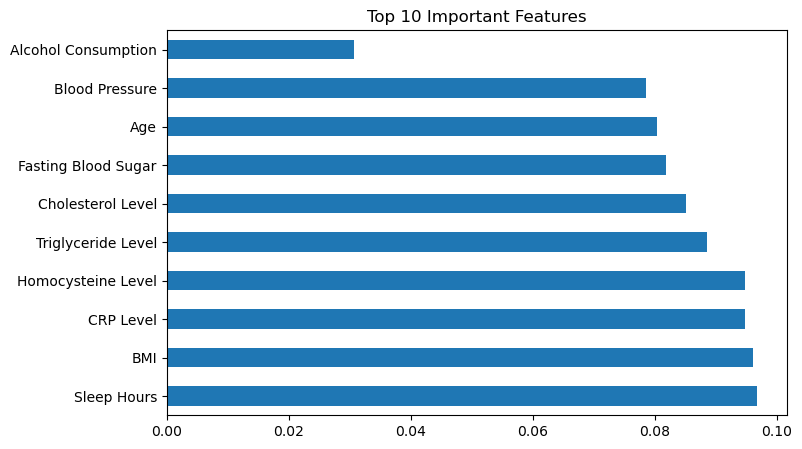

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Important_Features.png


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Important Features")

# Save figure
plot_path = os.path.join(output_dir, 'Important_Features.png')
plt.savefig(plot_path, bbox_inches='tight')
plt.show()
plt.close()
print(f"📈 Plot saved at: {plot_path}")

Trend & Distribution Insights
    Heart disease cases by Age Group
    Average Cholesterol per Exercise Habit
    Effect of Smoking on Blood Pressure
    Impact of Sleep Hours on Heart Disease Status

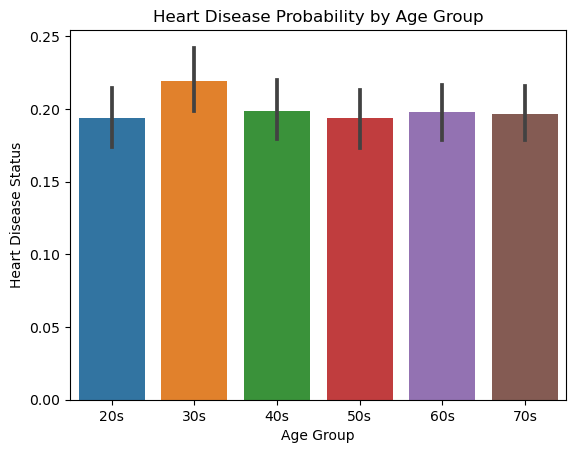

📈 Plot saved at: C:\Users\lenovo\Data Analytics\Heart Disease Risk Prediction and Analysis\Output Graphs\Heart_Disease_Probability_by_Age_Group.png


In [30]:
df['Age Group'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], labels=['20s','30s','40s','50s','60s','70s'])
sns.barplot(x='Age Group', y='Heart Disease Status', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Heart Disease Probability by Age Group")


# Save figure
plot_path = os.path.join(output_dir, 'Heart_Disease_Probability_by_Age_Group.png')
plt.savefig(plot_path, bbox_inches='tight')
plt.show()
plt.close()
print(f"📈 Plot saved at: {plot_path}")

Multicollinearity Check (Advanced)

Check if any features are too correlated (which affects model performance).

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.select_dtypes(include=['float64', 'int64']).drop('Heart Disease Status', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(vif_data)


                 Feature        VIF
0                    Age   8.047223
1                 Gender   1.992282
2         Blood Pressure  46.788738
3      Cholesterol Level  24.285149
4        Exercise Habits   2.454591
5                Smoking   2.043009
6   Family Heart Disease   1.984796
7               Diabetes   1.979620
8                    BMI  20.212524
9    High Blood Pressure   2.008356
10   Low HDL Cholesterol   1.992342
11  High LDL Cholesterol   1.974298
12   Alcohol Consumption   2.835601
13          Stress Level   2.518739
14           Sleep Hours  15.732714
15     Sugar Consumption   2.470601
16    Triglyceride Level   8.982892
17   Fasting Blood Sugar  23.567752
18             CRP Level   3.908558
19    Homocysteine Level   8.867431
